<a href="https://colab.research.google.com/github/badrinarayanan02/Predictive-Analytics/blob/main/2348507_PALab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Modelling

Used to identify the customers who are likely to stop using the company products and services. Churn refers to a loss of customers.

### Loading the Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
customer_data = pd.read_csv('/content/Churn_Modelling.csv')
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
customer_data.shape

(10000, 14)

In [5]:
customer_data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Inference

There is no null values in the customer churn dataset.

In [6]:
customer_data[customer_data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Categorical to Numerical

In [7]:
le = LabelEncoder()
customer_data['Gender'] = le.fit_transform(customer_data['Gender'])
customer_data = pd.get_dummies(customer_data, columns=['Geography'], drop_first = True)

In [8]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [9]:
features = ['CreditScore', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
X = customer_data[features]
Y = customer_data['Exited']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42, test_size=0.2)

### Feature Scaling

It is a Technique used to standardize the range of independent variables of the data. It improves the stabilities. We need to apply before training the model.

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train[:2]

array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
         0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
        -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
         0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
        -0.57638802]])

In [15]:
X_test[:2]

array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
         0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572313,
        -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , -1.38944225, -1.21847056,
         0.80843615,  0.64920267,  0.97481699,  0.79888291, -0.57946723,
        -0.57638802]])

### Model Building

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

n_estimators is the number of decision trees. More the trees we will be getting a accurate model but the computation will be huge.

In [17]:
y_pred = model.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [21]:
print(cm)
print(cr)
print('Accuracy Score: ', acc)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy Score:  0.8665


### Inference

Random Forest gave an accuracy of 0.8665.

### Feature Importance

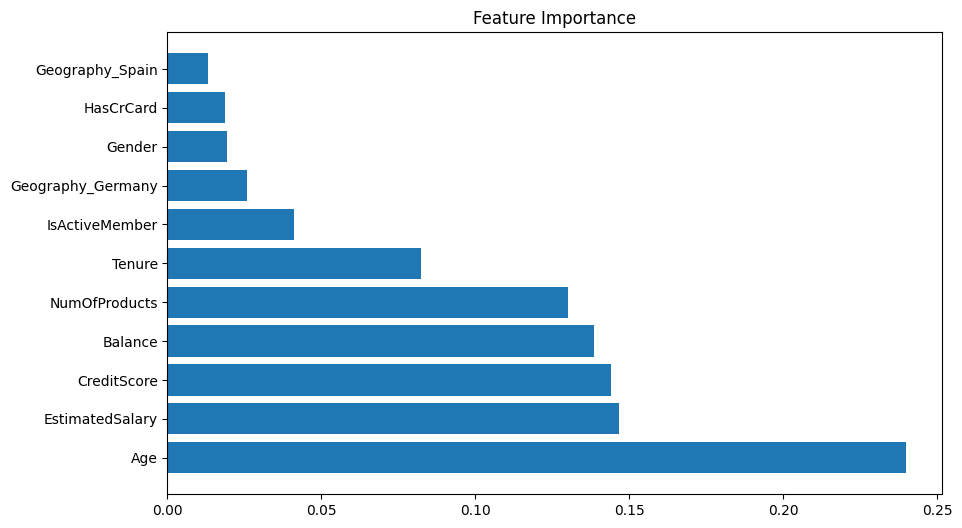

In [27]:
imp = model.feature_importances_
indices = np.argsort(imp)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), imp[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()


### Inference

Age is the most important feature for customer churning.

In [29]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_predlr = lr.predict(X_test)

In [31]:
conf_matrixlr = confusion_matrix(y_predlr, y_test)
class_reportlr = classification_report(y_predlr, y_test)
acc_lr = accuracy_score(y_predlr, y_test)

In [32]:
print(conf_matrixlr)
print(class_reportlr)
print(acc_lr)

[[1543  314]
 [  64   79]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1857
           1       0.20      0.55      0.29       143

    accuracy                           0.81      2000
   macro avg       0.58      0.69      0.59      2000
weighted avg       0.91      0.81      0.85      2000

0.811


### Inference

Logistic Regression gave an accuracy of 0.811, less when compared to random forest model. Precision and Recall is less, for this dataset logistic regression is not working out.

In [38]:
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [39]:
y_predsvc = svc.predict(X_test)

In [40]:
conf_matrixsvc = confusion_matrix(y_predsvc,y_test)
class_reportsvc = classification_report(y_predsvc, y_test)
acc_svc = accuracy_score(y_predsvc, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
print(conf_matrixsvc)
print(class_reportsvc)
print(acc_svc)

[[1607  393]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.80      2000
   macro avg       0.50      0.40      0.45      2000
weighted avg       1.00      0.80      0.89      2000

0.8035


### Inference

SVC gave a accuracy of 0.8035, less when compared to previous models.

In [43]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_predknn = knn.predict(X_test)

In [45]:
conf_matrixknn = confusion_matrix(y_predknn, y_test)
class_reportknn = classification_report(y_predknn, y_test)
acc_knn = accuracy_score(y_predknn, y_test)

In [46]:
print(conf_matrixknn)
print(class_reportknn)
print(acc_knn)

[[1514  247]
 [  93  146]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1761
           1       0.37      0.61      0.46       239

    accuracy                           0.83      2000
   macro avg       0.66      0.74      0.68      2000
weighted avg       0.87      0.83      0.85      2000

0.83


### Inference

KNeighbors Classifier gave an accuracy of 0.83.

In [48]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [49]:
y_predgb = gb.predict(X_test)

In [50]:
conf_matrixgb = confusion_matrix(y_predgb, y_test)
class_reportgb = classification_report(y_predgb, y_test)
acc_gb = accuracy_score(y_predgb, y_test)

In [51]:
print(conf_matrixgb)
print(class_reportgb)
print(acc_gb)

[[1543  201]
 [  64  192]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1744
           1       0.49      0.75      0.59       256

    accuracy                           0.87      2000
   macro avg       0.72      0.82      0.76      2000
weighted avg       0.90      0.87      0.88      2000

0.8675


### Inference

GradientBoostClassifier gave an accuracy of 0.8675, it is performing similar to random forest.

### Comparison

Tested 5 models. Randomforest and GradientBoost Classifer is performing well. SVC, Logistic Regression, Kneighbors are not good for this churn modelling dataset.